# Zn-Zn Pair correlation functions at T's just before, during and after Cu/ Zn order-disorder transition

Order-disorder transition T from our model is approximately 300C or 573K. We choose Zn-Zn PCFs as opposed to Cu-Cu PCFs for this analysis because the r=sqrt(2) peak is only present for the disordered system, making this a way to gauge increased Cu-Zn disorder.

First is cell is just a bash script used to comment out first line of RDF file (to avoid plotting the inf at r=0).

In [2]:
%%bash
for temp in $(seq -w 0 50 1000)
do
  sed -e '2s/^/#/' RDF_data/RDF_Z_Z_Temp_${temp}_Step_00002.dat > RDF_data/tmp.dat
  mv RDF_data/tmp.dat RDF_data/RDF_Z_Z_Temp_${temp}.dat
done

## Plotting Zn-Zn PCFs
Set T range in script below to plot the Zn-Zn PCF for various T's.

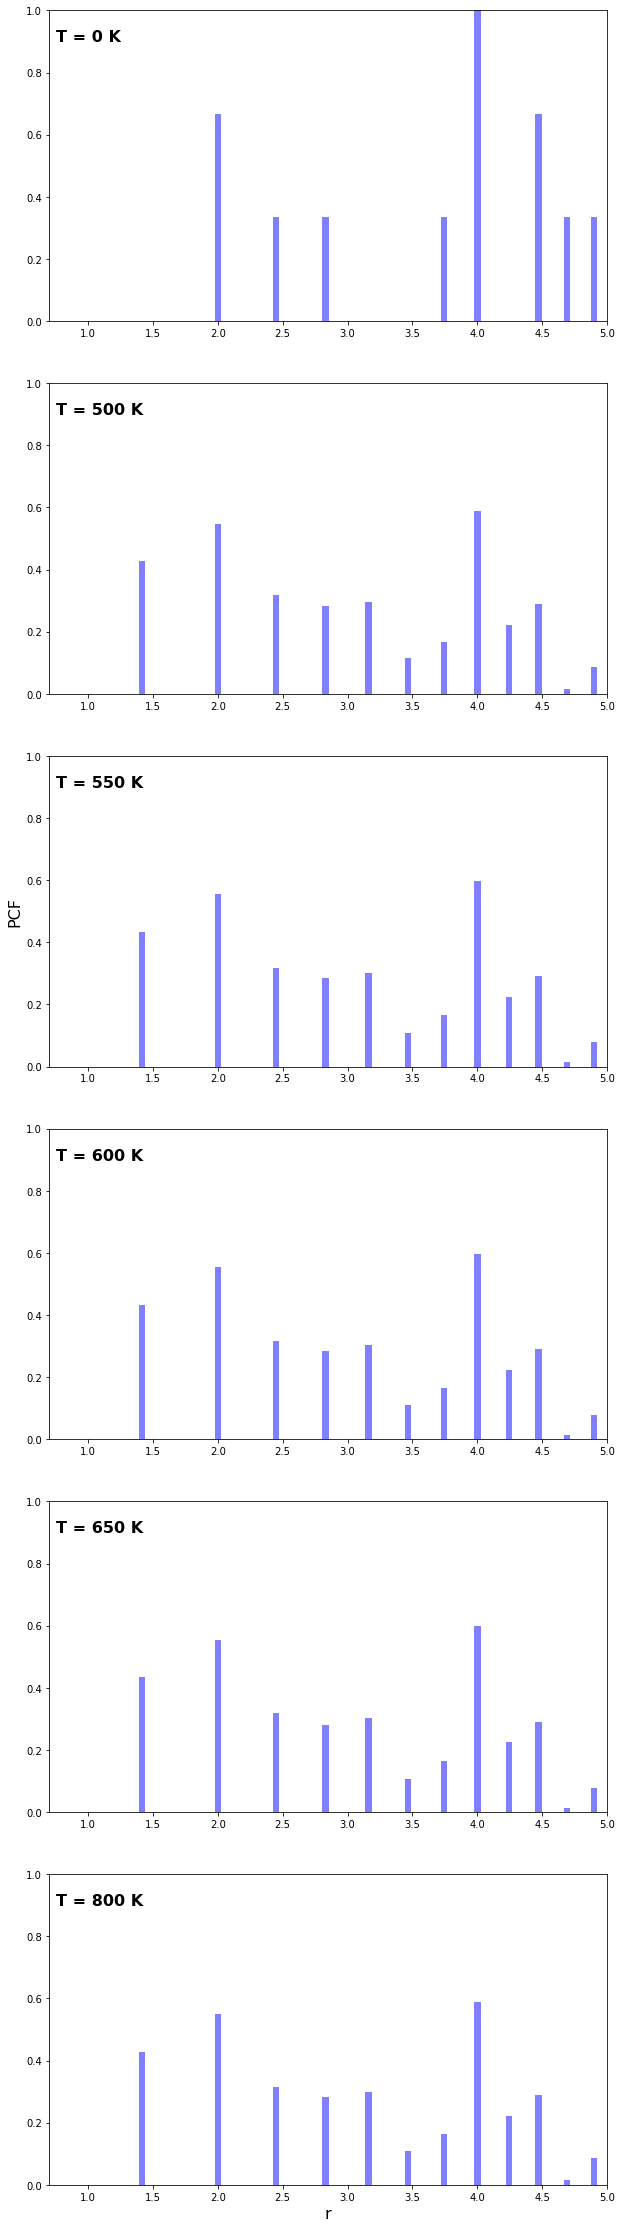

In [3]:
%matplotlib inline
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(10, 40)

T =(0, 500, 550, 600, 650, 800)

# -----------------------------------------------------------------------------------------------------
### Setting plot limits and number of subplots

# Custom limits
xmin=0.7
xmax=5
ymin=0.0
ymax=1

# -----------------------------------------------------------------------------------------------------
### Reading in PCFs for each temperature requested by user, comparing to ordered and disordered references, appending file for differences at each T

data_files=[]

for i in range(1, len(T)+1):

    # Reading in arguments and assigning as species
    temperature=str(T[i-1])
    temperature_formatted= str(temperature).zfill(4)

    # Define data files from species requested by user
    data_files.append("RDF_data/RDF_Z_Z_Temp_"+str(temperature_formatted)+".dat")
    simulation_data= np.genfromtxt(data_files[i-1], delimiter = ' ')

    plt.subplot(len(T), 1, i)
    plt.bar(simulation_data[:,1], simulation_data[:,2], width=0.05, alpha=0.5, color='b', label='Equilibrated configuration')

    plt.text(xmin+0.05, ymax-0.1*ymax, 'T = '+str(T[i-1])+' K', fontsize=16, fontweight='bold')
    if (i == math.ceil(len(T)/2)):
        plt.ylabel('PCF', size=16)  # Bit of a hack to get the y-axis label somewhere in the middle  

    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
  

#plt.subplots_adjust(bottom=0.2)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)

plt.xlabel('r', size=16) # Just for final plot
plt.show()

## Plotting differences between the Zn-Zn PCFs at certain T's
Differences in plots at T=500K (just before order-disorder transition) and T=600K (just after) appear to be mostly in the longer ranged pair correlations. New peaks begin to emerge in the T=500K plot compared to the T=0K plot, but after T=600K peak intensity of new and old peaks appear to have become constant, possibly reflecting the melting of the Cu-Zn sublattice?

Add temperatures to compare to script below to compare two plots from above.

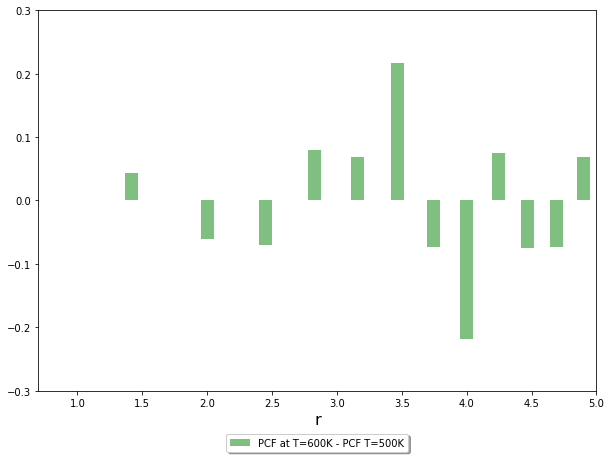

In [39]:
# Input two temperatures to compare PCFs on same plot
temp1 = 600
temp2 = 500

# Custom limits
xmin=0.7
xmax=5
ymin=-0.3
ymax=0.3

figsize(10, 7)

# Reading in arguments and assigning as species
temp1_formatted= str(temp1).zfill(4)
temp2_formatted= str(temp2).zfill(4)

#PCF_diff = []

# Define data files from species requested by user
data1= np.genfromtxt("RDF_data/RDF_Z_Z_Temp_"+str(temp1_formatted)+".dat", delimiter = ' ')
data2= np.genfromtxt("RDF_data/RDF_Z_Z_Temp_"+str(temp2_formatted)+".dat", delimiter = ' ')
PCF_diff = data1[:,2] - data2[:,2]

plt.bar(data1[:,1], PCF_diff, width=0.1, alpha=0.5, color ='g',  label='PCF at T='+str(temp1)+'K - PCF T='+str(temp2)+'K')

#plt.text(xmin+0.05, ymax-0.15*ymax, 'T = '+str(T[i-1])+' K', fontsize=16, fontweight='bold')
#if (i == math.ceil(len(T)/2)):
#    plt.ylabel('PCF', size=16)  # Bit of a hack to get the y-axis label somewhere in the middle  

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
  

#plt.subplots_adjust(bottom=0.2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)

plt.xlabel('r', size=16) # Just for final plot
plt.show()

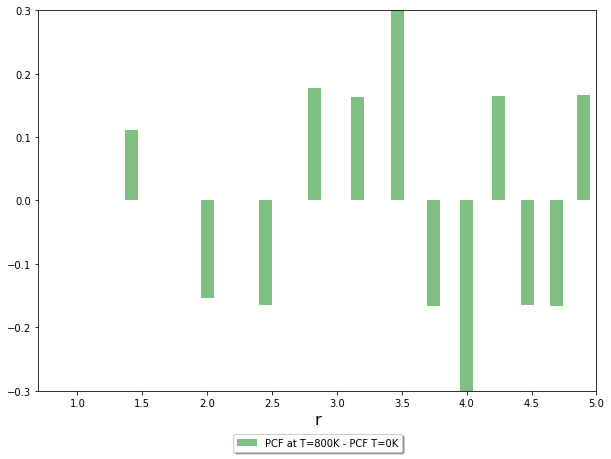

In [40]:
# Input two temperatures to compare PCFs on same plot
temp1 = 800
temp2 = 0

# Custom limits
xmin=0.7
xmax=5
ymin=-0.3
ymax=0.3

figsize(10, 7)

# Reading in arguments and assigning as species
temp1_formatted= str(temp1).zfill(4)
temp2_formatted= str(temp2).zfill(4)

#PCF_diff = []

# Define data files from species requested by user
data1= np.genfromtxt("RDF_data/RDF_Z_Z_Temp_"+str(temp1_formatted)+".dat", delimiter = ' ')
data2= np.genfromtxt("RDF_data/RDF_Z_Z_Temp_"+str(temp2_formatted)+".dat", delimiter = ' ')
PCF_diff = data1[:,2] - data2[:,2]

plt.bar(data1[:,1], PCF_diff, width=0.1, alpha=0.5, color ='g',  label='PCF at T='+str(temp1)+'K - PCF T='+str(temp2)+'K')

#plt.text(xmin+0.05, ymax-0.15*ymax, 'T = '+str(T[i-1])+' K', fontsize=16, fontweight='bold')
#if (i == math.ceil(len(T)/2)):
#    plt.ylabel('PCF', size=16)  # Bit of a hack to get the y-axis label somewhere in the middle  

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
  

#plt.subplots_adjust(bottom=0.2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)

plt.xlabel('r', size=16) # Just for final plot
plt.show()

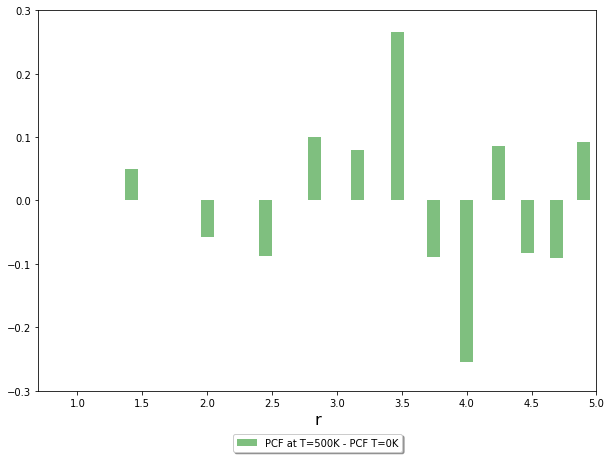

In [41]:
# Input two temperatures to compare PCFs on same plot
temp1 = 500
temp2 = 0

# Custom limits
xmin=0.7
xmax=5
ymin=-0.3
ymax=0.3

figsize(10, 7)

# Reading in arguments and assigning as species
temp1_formatted= str(temp1).zfill(4)
temp2_formatted= str(temp2).zfill(4)

#PCF_diff = []

# Define data files from species requested by user
data1= np.genfromtxt("RDF_data/RDF_Z_Z_Temp_"+str(temp1_formatted)+".dat", delimiter = ' ')
data2= np.genfromtxt("RDF_data/RDF_Z_Z_Temp_"+str(temp2_formatted)+".dat", delimiter = ' ')
PCF_diff = data1[:,2] - data2[:,2]

plt.bar(data1[:,1], PCF_diff, width=0.1, alpha=0.5, color ='g',  label='PCF at T='+str(temp1)+'K - PCF T='+str(temp2)+'K')

#plt.text(xmin+0.05, ymax-0.15*ymax, 'T = '+str(T[i-1])+' K', fontsize=16, fontweight='bold')
#if (i == math.ceil(len(T)/2)):
#    plt.ylabel('PCF', size=16)  # Bit of a hack to get the y-axis label somewhere in the middle  

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
  

#plt.subplots_adjust(bottom=0.2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)

plt.xlabel('r', size=16) # Just for final plot
plt.show()

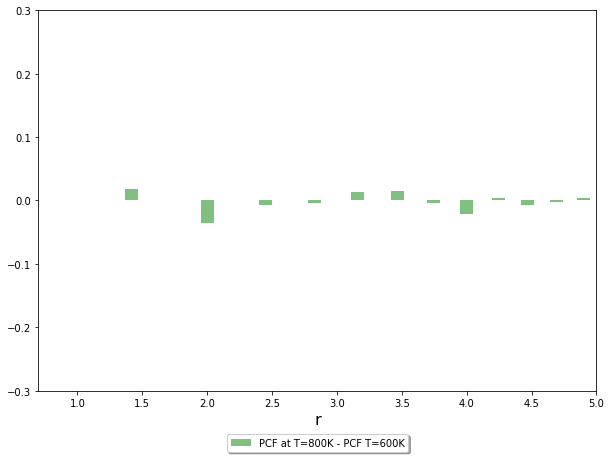

In [42]:
# Input two temperatures to compare PCFs on same plot
temp1 = 800
temp2 = 600

# Custom limits
xmin=0.7
xmax=5
ymin=-0.3
ymax=0.3

figsize(10, 7)

# Reading in arguments and assigning as species
temp1_formatted= str(temp1).zfill(4)
temp2_formatted= str(temp2).zfill(4)

#PCF_diff = []

# Define data files from species requested by user
data1= np.genfromtxt("RDF_data/RDF_Z_Z_Temp_"+str(temp1_formatted)+".dat", delimiter = ' ')
data2= np.genfromtxt("RDF_data/RDF_Z_Z_Temp_"+str(temp2_formatted)+".dat", delimiter = ' ')
PCF_diff = data1[:,2] - data2[:,2]

plt.bar(data1[:,1], PCF_diff, width=0.1, alpha=0.5, color ='g',  label='PCF at T='+str(temp1)+'K - PCF T='+str(temp2)+'K')

#plt.text(xmin+0.05, ymax-0.15*ymax, 'T = '+str(T[i-1])+' K', fontsize=16, fontweight='bold')
#if (i == math.ceil(len(T)/2)):
#    plt.ylabel('PCF', size=16)  # Bit of a hack to get the y-axis label somewhere in the middle  

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
  

#plt.subplots_adjust(bottom=0.2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)

plt.xlabel('r', size=16) # Just for final plot
plt.show()